# KLI Operations: Configuring AID Witnesses

<div class="alert alert-primary">
  <b>🎯 OBJECTIVE</b><hr>
Demonstrate how to configure witnesses and the Threshold of Accountable Duplicity (TOAD) in a configuration file and use it to create an AID 
</div>

## Verifying the Demo Witness Network

Now that you understand Witnesses and oobis, let's see some practical usage.

Within the deployment of these notebooks, we have included a demo witness network. It is composed of three witnesses: 
- `http://witness-demo:5642/oobi/BBilc4-L3tFUnfM_wJr4S4OJanAv_VmF_dJNN6vkf2Ha`
- `http://witness-demo:5643/oobi/BLskRTInXnMxWaGqcpSyMgo0nYbalW99cGZESrz3zapM`
- `http://witness-demo:5644/oobi/BIKKuvBwpmDVA4Ds-EpL5bt9OqPzWPja2LigFYZN2YfX`

(These witnesses are predefined (**[wan.json](config/witness-demo-docker/wan.json), [wes.json](config/witness-demo-docker/wes.json), [wil.json](config/witness-demo-docker/wil.json)**); that's why we know the prefixes beforehand) 

To verify the witness network is working, let's query the KEL of one of them using its oobi and `curl`. 

<div class="alert alert-info">
    <b>ℹ️ NOTE</b><hr>
    You can include request parameters on the end of an OOBI and when it is resolved they will be added as contact information for the controller whose OOBI is being resolved, like the <code>?name=Wan&tag=witness</code> section in the OOBI.
    <br/>
    <code>"http://witness-demo:5642/oobi/BBilc4-L3tFUnfM_wJr4S4OJanAv_VmF_dJNN6vkf2Ha/controller?name=Wan&tag=witness"</code>
    <br/>
    This will add the following properties to the contact data for the OOBI:
    <ul>
    <li>name as "Wan"</li>
    <li>tag as "witness"</li>
    </ul>
    This is a useful technique for enriching a contact in your contact database with human-friendly attributes.
</div>

In [ ]:
!curl -s http://witness-demo:5642/oobi/BBilc4-L3tFUnfM_wJr4S4OJanAv_VmF_dJNN6vkf2Ha

The command should have returned a KEL; you should be able to recognize part of it. It starts with `{"v": "KERI10JSON0000fd_", "t": "icp"...`. If so, the witness network is up and running. 

You will see that the response contains JSON and a cryptic text format that looks like `-VAn-AABAAAMl`. This is a CESR string, something we will get into in a later training.

## Keystore Initialization with Witness Configuration

Let's continue with the example. As usual, we need to create a keystore, but this time we are going to do something different. We are going to use a configuration file to provide the OOBIs of the witnesses to the keystore.

The content of the configuration file can be seen here: **[Keystore configuration file](config/keri/cf/keystore_init_config.json)**

In [ ]:
# Imports and Utility functions
from scripts.utils import clear_keri
clear_keri()

keystore_name="tests-keystore"

keystore_passcode="xSLg286d4iWiRg2mzGYca"

salt="0ABeuT2dErMrqFE5Dmrnc2Bq"

!kli init --name {keystore_name} --passcode {keystore_passcode} --salt {salt} \
    --config-dir ./config \
    --config-file keystore_init_config.json


## Listing keystore contacts
As you can see, the initialization has loaded the oobis. You can also check the loaded witness information by calling the `kli contact list` command  

In [ ]:
!kli contacts list --name {keystore_name} --passcode {keystore_passcode}

## Incepting an AID with Witness Configuration

Next, you can incept a new AID. Use a configuration file again.

The content of the configuration file (**[aid configuration file](config/aid_inception_config.json)**) can be seen here: 

```json
{
    "transferable": true,
    "wits": ["BBilc4-L3tFUnfM_wJr4S4OJanAv_VmF_dJNN6vkf2Ha","BLskRTInXnMxWaGqcpSyMgo0nYbalW99cGZESrz3zapM"],
    "toad": 1,
    "icount": 1,
    "ncount": 1,
    "isith": "1",
    "nsith": "1"
}
```

Notable highlights in this configuration are the inclusion of the witnesses' prefixes and the `toad` set to 1

Here is the `incept` command:

In [ ]:
aid_alias_transferable = "aid-transferable"

!kli incept --name {keystore_name} --alias {aid_alias_transferable} --passcode {keystore_passcode} \
    --file ./config/aid_inception_config.json

Check the status of the AID using `kli status`

In [ ]:
!kli status --name {keystore_name} --alias {aid_alias_transferable} --passcode {keystore_passcode} --verbose

In this status, you will find a few new things:
- The witnesses section has a count of 2 and mentions two receipts and a threshold of 1
- The KEL has the `b` field populated with the witnesses' prefixes
- The `bt` threshold is set to 1 (toad)

Guidance for setting the proper threshold, "toad," for the number of witnesses may be found in the KERI Algorithm for Witness Agreement ([KAWA](https://trustoverip.github.io/tswg-keri-specification/#keris-algorithm-for-witness-agreement-kawa)). Generally this means having roughly between 2/3 and 3/4 of witness nodes available, though the equation and table shown below give a precise definition of how to calculate TOAD.

In the below chart N = the number of witnessess and M = the number that TOAD should be set to in order to have a strong guarantee of witness agreement even in the face of faulty witnesses.

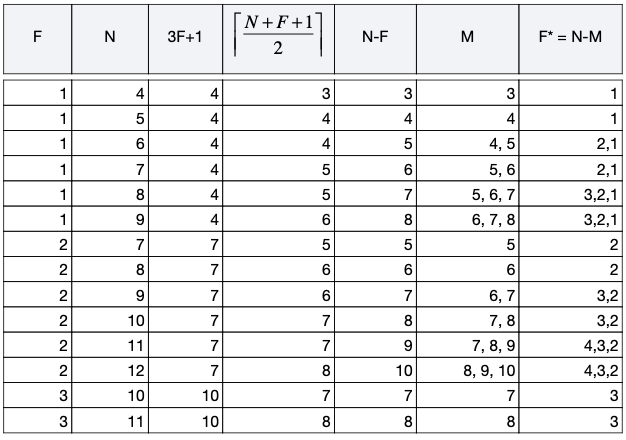

<div class="alert alert-primary">
<b>📝 SUMMARY</b><hr>
We used the demo witness network to provide receipts for the inception event of an identifier.
<br/>
Witnesses are specified during AID inception using a configuration file by listing their AID prefixes in the <code>wits</code> property of the inception configuration and by setting the Threshold of Accountable Duplicity <code>toad</code> property to a non-zero number. The <code>kli incept</code> command utilizes this file to create the AID, embedding the witness information into the inception event. Checking the AID status with <code>kli status ... --verbose</code> reveals the witness prefixes in the <code>b</code> field, the TOAD in the <code>bt</code> field, and any received witness receipts.
<br/>
The table listed above may be used as guidance for setting the TOAD to ensure a strong guarantee of witness agreement. 
</div>